In [60]:
import numpy as np
import pandas as pd
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import textwrap

In [30]:
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

In [31]:
timeline = pd.read_csv('cv19_timeline_utf8.csv')
timeline_uk = pd.read_csv('uk_cv19_timeline_utf8.csv')

In [62]:
textwrap.wrap(timeline['Headline'][0], 20)

['China alerts WHO to', 'new virus']

In [36]:
timeline_dates_corrected = []
for date in timeline.Date.values:
    timeline_dates_corrected.append(datetime.date(year=int('20'+date[7:]), month=months[date[3:6]], day=int(date[:2])))

timeline['Date_'] = timeline_dates_corrected

timeline_uk_dates_corrected = []
for date in timeline_uk.Date.values:
    timeline_uk_dates_corrected.append(datetime.date(year=int('20'+date[7:]), month=months[date[3:6]], day=int(date[:2])))

timeline_uk['Date_'] = timeline_uk_dates_corrected

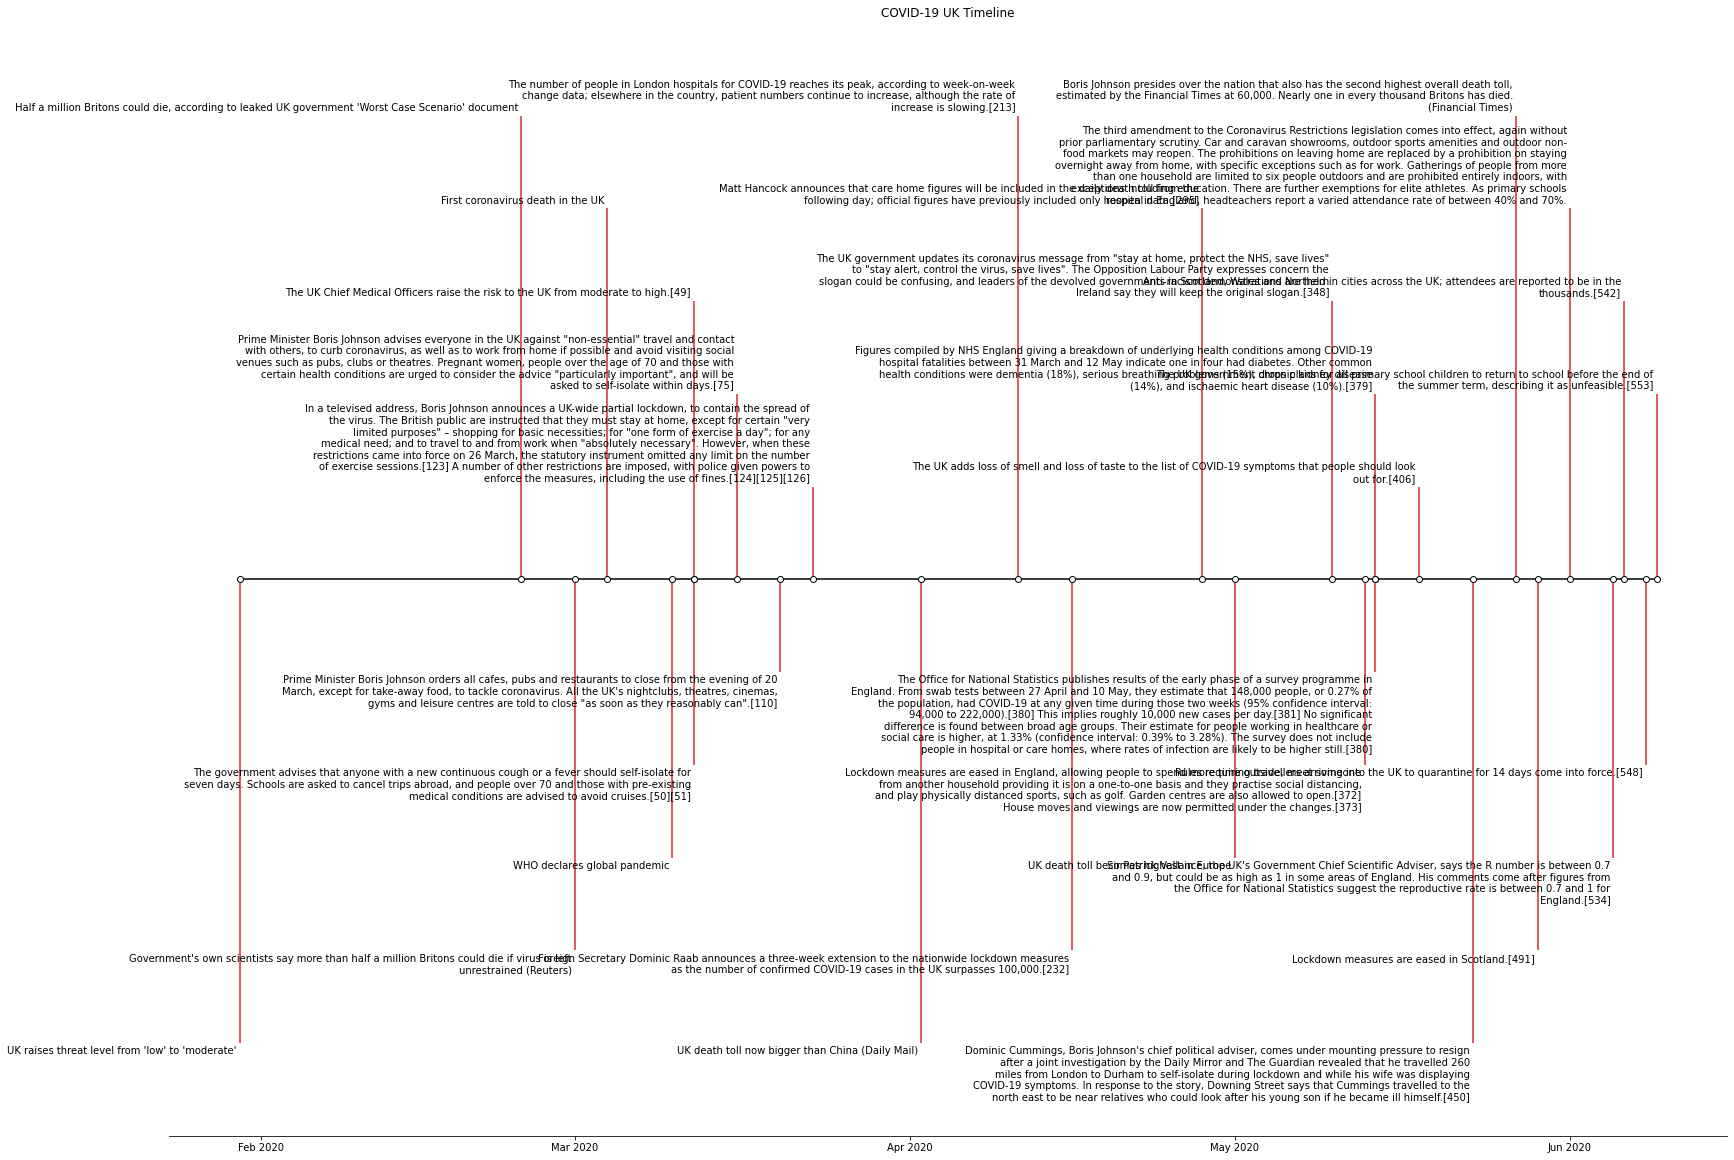

In [71]:
string_linebreak = 100
# Choose some nice levels
levels = np.tile([-5, 5,-4, 4, -3, 3, -2, 2,  -1, 1],
                 int(np.ceil(len(timeline_uk['Date_'])/6)))[:len(timeline_uk['Date_'])]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(24, 16), constrained_layout=True)
ax.set(title="COVID-19 UK Timeline")

ax.vlines(timeline_uk['Date_'], 0, levels, color="tab:red")  # The vertical stems.
ax.plot(timeline_uk['Date_'], np.zeros_like(timeline_uk['Date_']), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(timeline_uk['Date_'], levels, timeline_uk['Headline']):
    ax.annotate("\n".join(textwrap.wrap(r, string_linebreak)), xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 4 month intervals
#ax.set_xlabel('Date')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
#plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.show()

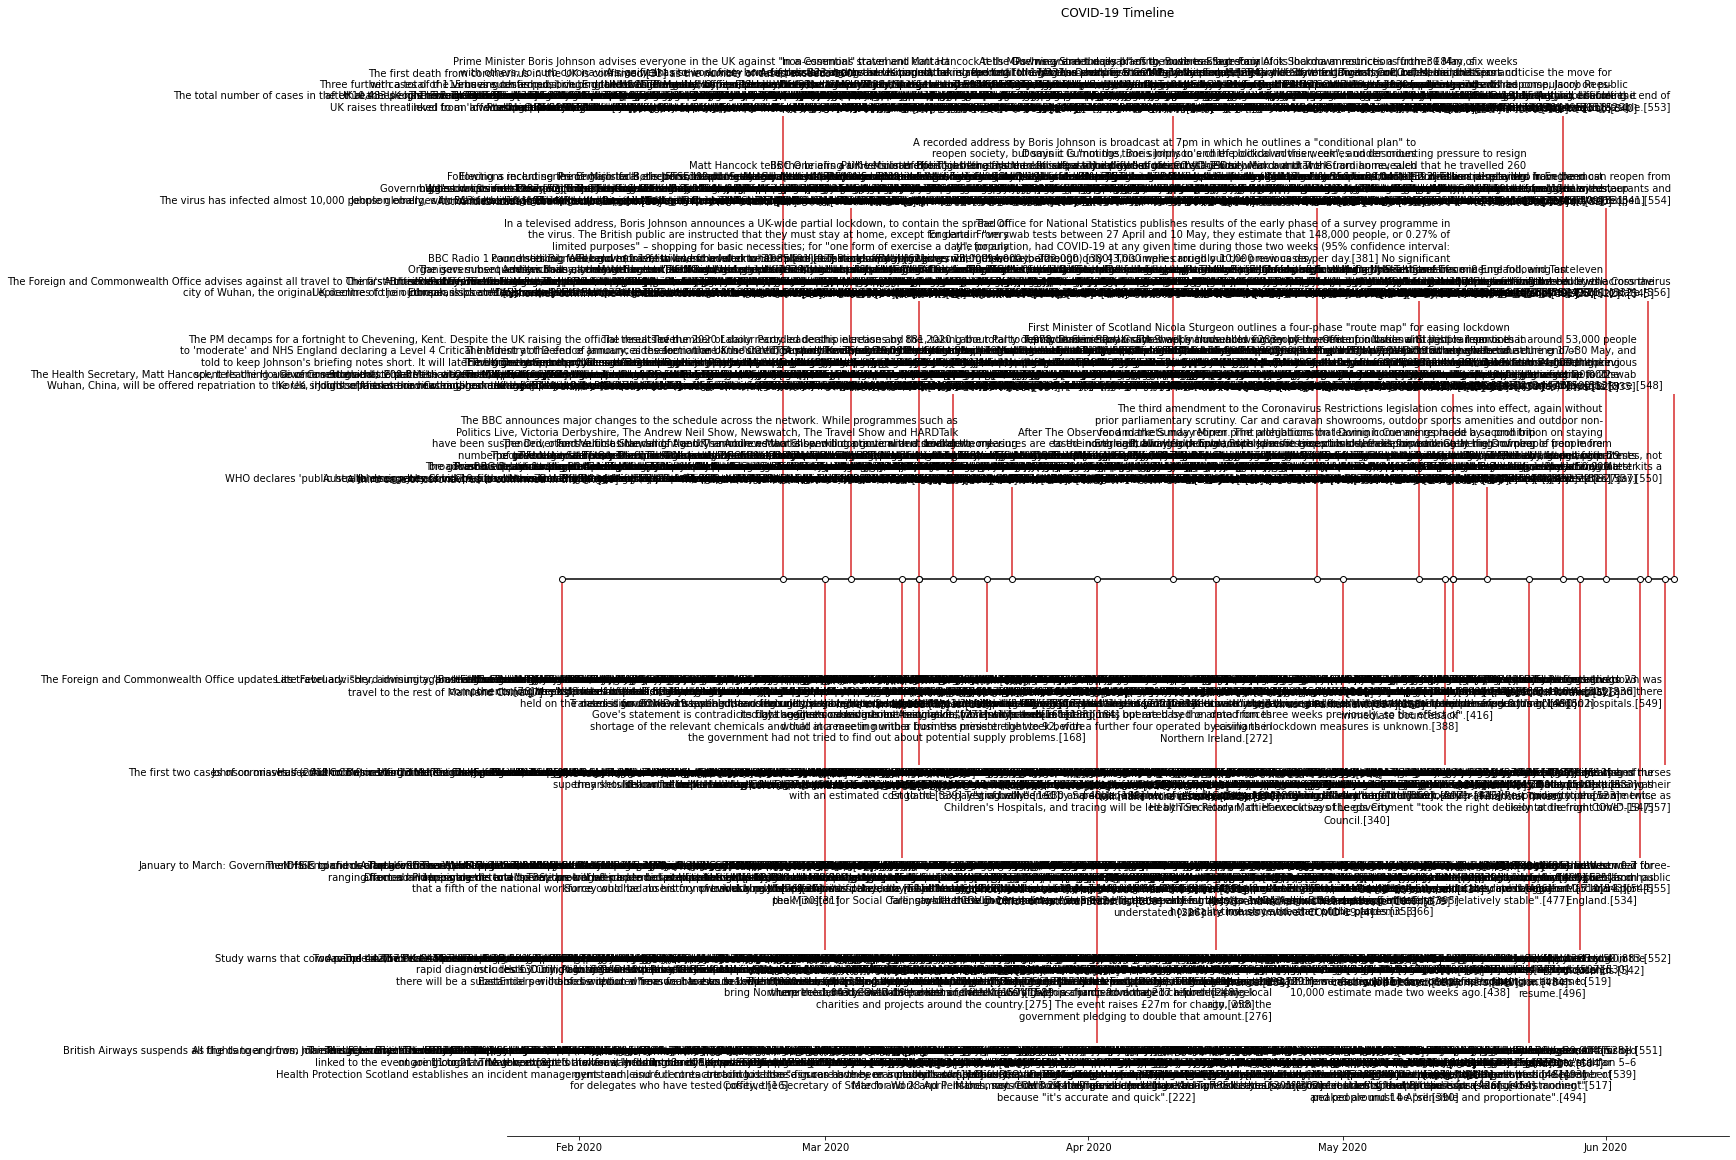

In [72]:
string_linebreak = 100
# Choose some nice levels
levels = np.tile([-5, 5,-4, 4, -3, 3, -2, 2,  -1, 1],
                 int(np.ceil(len(timeline['Date_'])/6)))[:len(timeline['Date_'])]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(24, 16), constrained_layout=True)
ax.set(title="COVID-19 Timeline")

ax.vlines(timeline_uk['Date_'], 0, levels, color="tab:red")  # The vertical stems.
ax.plot(timeline_uk['Date_'], np.zeros_like(timeline_uk['Date_']), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(timeline['Date_'], levels, timeline['Headline']):
    ax.annotate("\n".join(textwrap.wrap(r, string_linebreak)), xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 4 month intervals
#ax.set_xlabel('Date')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
#plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.show()